In [1]:
# importing required libraries
import matplotlib
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN
from yellowbrick.cluster import KElbowVisualizer, silhouette_visualizer
import matplotlib.pyplot as plt
from sklearn.metrics.cluster import silhouette_score, silhouette_samples, silhouette_score
from sklearn.neighbors import NearestNeighbors
import seaborn as sns
import pyvista as pv
import vtk
import os
from vtk import vtkStructuredPoints
from skimage import io, transform
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.animation as animation
import matplotlib.colors as mcolors

In [2]:
df = pd.read_csv("/home/bambito9/Esports-Data-Analysis/API Requests/League of Legends/Datasets/Patch13_3/Professional/FinalProfessionalPlayersDataset.csv", dtype = {'skillSlot': str, 'buildingType': str, 'lane': str, 'monster': str, "itemName": str})
df

,gameId,team,summoner,region,champion,timestamp,coordinate_x,coordinate_y,level,minionsKilled,...,trueDamageDoneToChampions,trueDamageTaken,victory,eventType,skillSlot,buildingType,lane,monster,itemName,role
0,EUW1_6272362521,Blue,anonymous 2,euw1,Akshan,0.000000,554.0,581.0,1.0,0.0,...,0.0,0.0,False,NaN,NaN,NaN,NaN,NaN,NaN,TOP
1,EUW1_6272362521,Blue,anonymous 2,euw1,Akshan,1.000300,3177.0,8848.0,1.0,0.0,...,0.0,0.0,False,NaN,NaN,NaN,NaN,NaN,NaN,TOP
2,EUW1_6272362521,Blue,anonymous 2,euw1,Akshan,2.000733,2665.0,13301.0,1.0,2.0,...,0.0,0.0,False,NaN,NaN,NaN,NaN,NaN,NaN,TOP
3,EUW1_6272362521,Blue,anonymous 2,euw1,Akshan,1.932467,NaN,NaN,NaN,NaN,...,NaN,NaN,False,SkillLevelUp,1.0,NaN,NaN,NaN,NaN,TOP
4,EUW1_6272362521,Blue,anonymous 2,euw1,Akshan,3.001000,3352.0,13461.0,3.0,14.0,...,0.0,0.0,False,NaN,NaN,NaN,NaN,NaN,NaN,TOP
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
392066,NA1_4573614609,Red,anonymous 97,na1,Kaisa,23.473867,NaN,NaN,NaN,NaN,...,NaN,NaN,False,Item purchased,NaN,NaN,NaN,NaN,Locket of the Iron Solari,BOTTOM
392067,NA1_4573614609,Red,anonymous 97,na1,Kaisa,23.488683,NaN,NaN,NaN,NaN,...,NaN,NaN,False,Item purchased,NaN,NaN,NaN,NaN,Control Ward,BOTTOM
392068,NA1_4573614609,Red,anonymous 97,na1,Kaisa,23.491417,NaN,NaN,NaN,NaN,...,NaN,NaN,False,Item purchased,NaN,NaN,NaN,NaN,Control Ward,BOTTOM
392069,NA1_4573614609,Red,anonymous 97,na1,Kaisa,26.337567,NaN,NaN,NaN,NaN,...,NaN,NaN,False,Item purchased,NaN,NaN,NaN,NaN,Null-Magic Mantle,BOTTOM


In [3]:
mid_deaths_df = df[(df["role"] == "MIDDLE") & (df["eventType"].isna())]
mid_deaths_df

,gameId,team,summoner,region,champion,timestamp,coordinate_x,coordinate_y,level,minionsKilled,...,trueDamageDoneToChampions,trueDamageTaken,victory,eventType,skillSlot,buildingType,lane,monster,itemName,role
13675,EUW1_6273554065,Red,anonymous 52,euw1,Syndra,0.000000,14398.0,14582.0,1.0,0.0,...,0.0,0.0,False,NaN,NaN,NaN,NaN,NaN,NaN,MIDDLE
13676,EUW1_6273554065,Red,anonymous 52,euw1,Syndra,1.000133,11446.0,5986.0,1.0,0.0,...,0.0,0.0,False,NaN,NaN,NaN,NaN,NaN,NaN,MIDDLE
13678,EUW1_6273554065,Red,anonymous 52,euw1,Syndra,2.000367,7817.0,7527.0,1.0,5.0,...,0.0,0.0,False,NaN,NaN,NaN,NaN,NaN,NaN,MIDDLE
13679,EUW1_6273554065,Red,anonymous 52,euw1,Syndra,3.000583,7214.0,7070.0,3.0,17.0,...,0.0,0.0,False,NaN,NaN,NaN,NaN,NaN,NaN,MIDDLE
13682,EUW1_6273554065,Red,anonymous 52,euw1,Syndra,4.000783,7971.0,8191.0,4.0,28.0,...,0.0,0.0,False,NaN,NaN,NaN,NaN,NaN,NaN,MIDDLE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279138,KR_6376021134,Red,anonymous 78,kr,Viktor,23.006350,14116.0,10834.0,14.0,179.0,...,0.0,914.0,False,NaN,NaN,NaN,NaN,NaN,NaN,MIDDLE
279141,KR_6376021134,Red,anonymous 78,kr,Viktor,24.006833,8799.0,8262.0,14.0,183.0,...,0.0,914.0,False,NaN,NaN,NaN,NaN,NaN,NaN,MIDDLE
279142,KR_6376021134,Red,anonymous 78,kr,Viktor,25.007283,2285.0,12533.0,14.0,194.0,...,0.0,914.0,False,NaN,NaN,NaN,NaN,NaN,NaN,MIDDLE
279143,KR_6376021134,Red,anonymous 78,kr,Viktor,26.007550,5648.0,14080.0,14.0,199.0,...,0.0,1041.0,False,NaN,NaN,NaN,NaN,NaN,NaN,MIDDLE


Champions' winrates

In [4]:
profiling_df = mid_deaths_df[(mid_deaths_df["victory"] == True)].copy()

In [5]:
champs = {}
for m in np.unique(profiling_df["gameId"]):
    temp_df = profiling_df[profiling_df["gameId"] == m]
    champs_df = np.unique(temp_df["champion"])
    #print(champs_df[0])
    try:
        champs[str(champs_df[0])] = champs[str(champs_df[0])] + 1
    except:
        champs[str(champs_df[0])] = 1

#print("Victories with each champion:\n")
champs_df = pd.DataFrame.from_dict(champs, orient="index", columns=['victories'])
#champs_df.sort_values(by=["victories"], ascending=False)
#print(champs)
    

In [6]:
profiling_df = mid_deaths_df[(mid_deaths_df["victory"] == False)].copy()

In [7]:
champs = {}
for m in np.unique(profiling_df["gameId"]):
    temp_df = profiling_df[profiling_df["gameId"] == m]
    champs_df2 = np.unique(temp_df["champion"])
    #print(champs_df[0])
    try:
        champs[str(champs_df2[0])] = champs[str(champs_df2[0])] + 1
    except:
        champs[str(champs_df2[0])] = 1

champs_df2 = pd.DataFrame.from_dict(champs, orient="index", columns=['defeats'])

champs_winrate = [champs_df, champs_df2]
champs_winrate_df = pd.concat(champs_winrate, axis=1)

champsWinrates = []
for row in champs_winrate_df.iterrows():
    champsWinrates_row = {}
    if(np.isnan(row[1][0])):
        row[1][0] = 0
    if(np.isnan(row[1][1])):
        row[1][1] = 0
    champsWinrates_row["champion"] = str(row[0])
    champsWinrates_row["win rate"] = round(row[1][0]/(row[1][0] + row[1][1]), 2)
    champsWinrates_row["matches"] = row[1][0] + row[1][1]

    champsWinrates.append(champsWinrates_row)

champsWinrates_df = pd.DataFrame(champsWinrates).set_index(["champion"])
champsWinrates_df.sort_values(by=["matches", "win rate"], ascending= False)

,win rate,matches
champion,,
AurelionSol,0.51,150.0
Tristana,0.51,94.0
Jayce,0.57,92.0
Sylas,0.46,81.0
Azir,0.51,77.0
Akali,0.51,71.0
Annie,0.61,67.0
Viktor,0.52,63.0
Syndra,0.54,56.0


In [8]:
print("This dataset contains {} matches in which the mid died at least once".format(len(np.unique(mid_deaths_df["gameId"]))))

This dataset contains 1120 matches in which the mid died at least once


In [9]:
print("{} players died a total of {} times".format(len(np.unique(mid_deaths_df["summoner"])), mid_deaths_df.shape[0]))

19 players died a total of 31490 times


In [10]:
print("This Dataset contains an average of {} deaths per game".format((mid_deaths_df.shape[0]/len(np.unique(mid_deaths_df["gameId"])))))

This Dataset contains an average of 28.116071428571427 deaths per game


In [11]:
blueSide_mid_deaths_df = mid_deaths_df[mid_deaths_df["team"] == "Blue"]
blueSide_mid_deaths_df

,gameId,team,summoner,region,champion,timestamp,coordinate_x,coordinate_y,level,minionsKilled,...,trueDamageDoneToChampions,trueDamageTaken,victory,eventType,skillSlot,buildingType,lane,monster,itemName,role
13823,EUW1_6273050720,Blue,anonymous 52,euw1,Sylas,0.000000,194.0,457.0,1.0,0.0,...,0.0,0.0,False,NaN,NaN,NaN,NaN,NaN,NaN,MIDDLE
13824,EUW1_6273050720,Blue,anonymous 52,euw1,Sylas,1.000417,6397.0,6400.0,1.0,0.0,...,0.0,0.0,False,NaN,NaN,NaN,NaN,NaN,NaN,MIDDLE
13825,EUW1_6273050720,Blue,anonymous 52,euw1,Sylas,2.000700,7260.0,7081.0,1.0,3.0,...,0.0,0.0,False,NaN,NaN,NaN,NaN,NaN,NaN,MIDDLE
13827,EUW1_6273050720,Blue,anonymous 52,euw1,Sylas,3.000967,6228.0,6334.0,3.0,15.0,...,5.0,0.0,False,NaN,NaN,NaN,NaN,NaN,NaN,MIDDLE
13830,EUW1_6273050720,Blue,anonymous 52,euw1,Sylas,4.001033,652.0,512.0,4.0,28.0,...,5.0,0.0,False,NaN,NaN,NaN,NaN,NaN,NaN,MIDDLE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
278930,KR_6375941718,Blue,anonymous 76,kr,Vex,23.007917,8598.0,7492.0,13.0,124.0,...,834.0,582.0,False,NaN,NaN,NaN,NaN,NaN,NaN,MIDDLE
278933,KR_6375941718,Blue,anonymous 76,kr,Vex,24.007950,2014.0,9610.0,13.0,124.0,...,834.0,582.0,False,NaN,NaN,NaN,NaN,NaN,NaN,MIDDLE
278934,KR_6375941718,Blue,anonymous 76,kr,Vex,25.008350,4355.0,5101.0,13.0,135.0,...,1082.0,642.0,False,NaN,NaN,NaN,NaN,NaN,NaN,MIDDLE
278937,KR_6375941718,Blue,anonymous 76,kr,Vex,26.008483,4695.0,2876.0,14.0,139.0,...,1082.0,642.0,False,NaN,NaN,NaN,NaN,NaN,NaN,MIDDLE


In [12]:
gamesBlueSide = len(np.unique(blueSide_mid_deaths_df["gameId"]))
gamesBlueSide

483

In [13]:
players_df = np.unique(blueSide_mid_deaths_df["summoner"])
for player in players_df:
    temp_df = blueSide_mid_deaths_df[blueSide_mid_deaths_df["summoner"] == player]
    print("{} played {} matches".format(player, len(np.unique(temp_df["gameId"]))))

anonymous 52 played 46 matches
anonymous 53 played 33 matches
anonymous 54 played 43 matches
anonymous 56 played 20 matches
anonymous 57 played 63 matches
anonymous 58 played 14 matches
anonymous 59 played 9 matches
anonymous 60 played 21 matches
anonymous 62 played 22 matches
anonymous 63 played 30 matches
anonymous 64 played 16 matches
anonymous 65 played 29 matches
anonymous 68 played 21 matches
anonymous 71 played 28 matches
anonymous 74 played 12 matches
anonymous 75 played 21 matches
anonymous 76 played 15 matches
anonymous 77 played 13 matches
anonymous 78 played 27 matches


In [14]:
print("Blue side contains {} matches in which the mid died at least once".format(len(np.unique(blueSide_mid_deaths_df["gameId"]))))

Blue side contains 483 matches in which the mid died at least once


In [15]:
print("{} players died a total of {} times on the blue side".format(len(np.unique(blueSide_mid_deaths_df["summoner"])), blueSide_mid_deaths_df.shape[0]))

19 players died a total of 13153 times on the blue side


In [16]:
redSide_mid_deaths_df = mid_deaths_df[mid_deaths_df["team"] == "Red"]
redSide_mid_deaths_df

,gameId,team,summoner,region,champion,timestamp,coordinate_x,coordinate_y,level,minionsKilled,...,trueDamageDoneToChampions,trueDamageTaken,victory,eventType,skillSlot,buildingType,lane,monster,itemName,role
13675,EUW1_6273554065,Red,anonymous 52,euw1,Syndra,0.000000,14398.0,14582.0,1.0,0.0,...,0.0,0.0,False,NaN,NaN,NaN,NaN,NaN,NaN,MIDDLE
13676,EUW1_6273554065,Red,anonymous 52,euw1,Syndra,1.000133,11446.0,5986.0,1.0,0.0,...,0.0,0.0,False,NaN,NaN,NaN,NaN,NaN,NaN,MIDDLE
13678,EUW1_6273554065,Red,anonymous 52,euw1,Syndra,2.000367,7817.0,7527.0,1.0,5.0,...,0.0,0.0,False,NaN,NaN,NaN,NaN,NaN,NaN,MIDDLE
13679,EUW1_6273554065,Red,anonymous 52,euw1,Syndra,3.000583,7214.0,7070.0,3.0,17.0,...,0.0,0.0,False,NaN,NaN,NaN,NaN,NaN,NaN,MIDDLE
13682,EUW1_6273554065,Red,anonymous 52,euw1,Syndra,4.000783,7971.0,8191.0,4.0,28.0,...,0.0,0.0,False,NaN,NaN,NaN,NaN,NaN,NaN,MIDDLE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279138,KR_6376021134,Red,anonymous 78,kr,Viktor,23.006350,14116.0,10834.0,14.0,179.0,...,0.0,914.0,False,NaN,NaN,NaN,NaN,NaN,NaN,MIDDLE
279141,KR_6376021134,Red,anonymous 78,kr,Viktor,24.006833,8799.0,8262.0,14.0,183.0,...,0.0,914.0,False,NaN,NaN,NaN,NaN,NaN,NaN,MIDDLE
279142,KR_6376021134,Red,anonymous 78,kr,Viktor,25.007283,2285.0,12533.0,14.0,194.0,...,0.0,914.0,False,NaN,NaN,NaN,NaN,NaN,NaN,MIDDLE
279143,KR_6376021134,Red,anonymous 78,kr,Viktor,26.007550,5648.0,14080.0,14.0,199.0,...,0.0,1041.0,False,NaN,NaN,NaN,NaN,NaN,NaN,MIDDLE


In [17]:
gamesRedSide = len(np.unique(redSide_mid_deaths_df["gameId"]))
gamesRedSide

679

In [18]:
players_df = np.unique(redSide_mid_deaths_df["summoner"])
for player in players_df:
    temp_df = redSide_mid_deaths_df[redSide_mid_deaths_df["summoner"] == player]
    print("{} played {} matches".format(player, len(np.unique(temp_df["gameId"]))))

anonymous 52 played 61 matches
anonymous 53 played 40 matches
anonymous 54 played 54 matches
anonymous 56 played 32 matches
anonymous 57 played 91 matches
anonymous 58 played 22 matches
anonymous 59 played 23 matches
anonymous 60 played 39 matches
anonymous 62 played 22 matches
anonymous 63 played 67 matches
anonymous 64 played 21 matches
anonymous 65 played 23 matches
anonymous 68 played 17 matches
anonymous 71 played 38 matches
anonymous 74 played 10 matches
anonymous 75 played 41 matches
anonymous 76 played 11 matches
anonymous 77 played 25 matches
anonymous 78 played 42 matches


In [19]:
print("Red side contains {} matches in which the mid died at least once".format(len(np.unique(redSide_mid_deaths_df["gameId"]))))

Red side contains 679 matches in which the mid died at least once


In [20]:
print("{} players died a total of {} times on the red side".format(len(np.unique(redSide_mid_deaths_df["summoner"])), redSide_mid_deaths_df.shape[0]))

19 players died a total of 18337 times on the red side


function to visualize the results

In [21]:
def visualizeResults(df, data_scaled, model, team, kmeans, cluster_colors,details = "None"):
    # Visualize the results
    image = plt.imread("/home/bambito9/Esports-Data-Analysis/API Requests/League of Legends/Clustering Analyses/map11.png")
    fig, ax = plt.subplots()
    ax.imshow(image, extent=[0, 16000, 0, 16000])

    #scatter = ax.scatter(df['coordinate_x'], df['coordinate_y'], c=df['cluster'], cmap="plasma")
    #colors = np.array(["blueviolet", "yellow", "lime", "crimson"])
    
    for c in np.unique(df["cluster"]):
        temp_df = df[df["cluster"] == c]
        scatter = ax.scatter(temp_df['coordinate_x'], temp_df['coordinate_y'], color = cluster_colors[c])
    plt.xlabel('X')
    plt.ylabel('Y')


    if(details == "None"):
        title = "Mid Players' locations in the " + team + "\nK-Means: n_clusters - " + str(kmeans.get_params()["n_clusters"]) 
    else:
        title = "Mid Players' locations in the " + team + " " + details + "\nK-Means: n_clusters - " + str(kmeans.get_params()["n_clusters"])
    plt.title(title)
    plt.grid(visible=None)

    lg = ax.legend(["0", "1", "2", "3"], frameon = True, loc='center left', bbox_to_anchor=(1, 0.7),
            fancybox=True, shadow=True)
    lg.get_frame().set_linewidth(1)
    lg.get_frame().set_edgecolor("black")

    plt.show()

    #drawSillouette(data_scaled, model.labels_, silhouetteTitle)
    silhouette_visualizer(kmeans, data_scaled, colors=cluster_colors, title = title)

    print("Silhouette score: {}".format(silhouette_score(data_scaled, model.labels_)))
    print("{}".format(df["cluster"].value_counts()))

    colors = []
    for color in cluster_colors:
        colors.append(matplotlib.colors.cnames[color])


    return colors

function to view the average values in each cluster

In [22]:
def clusterMeanValues(df):
    nclusters = np.unique(df["cluster"])

    D={"cluster": [],
    "coordinate_x": [],
    "coordinate_y": [],
    "timestamp": []}

    print("Mean values for each cluster:")
    for cluster in nclusters:
        temporary_df = df[df["cluster"] == cluster]
        D["cluster"].append(cluster)
        D["coordinate_x"].append(np.mean(temporary_df["coordinate_x"]))
        D["coordinate_y"].append(np.mean(temporary_df["coordinate_y"]))
        D["timestamp"].append(np.mean(temporary_df["timestamp"]))

    clustersDF = pd.DataFrame(D)

    return clustersDF    

function to view the standard deviation in each cluster

In [23]:
def clusterStandardDeviation(df):
    nclusters = np.unique(df["cluster"])

    D={"cluster": [],
    "coordinate_x": [],
    "coordinate_y": [],
    "timestamp": []}

    print("Standard deviation for each cluster:")
    for cluster in nclusters:
        temporary_df = df[df["cluster"] == cluster]
        D["cluster"].append(cluster)
        D["coordinate_x"].append(np.std(temporary_df["coordinate_x"]))
        D["coordinate_y"].append(np.std(temporary_df["coordinate_y"]))
        D["timestamp"].append(np.std(temporary_df["timestamp"]))

    clustersDF = pd.DataFrame(D)

    return clustersDF    

function to view the max and min values in each cluster

In [24]:
def clusterMinMaxValues(df):
    nclusters = np.unique(df["cluster"])

    D={"cluster": [],
    "max coordinate_x": [],
    "min coordinate_x": [],
    "max coordinate_y": [],
    "min coordinate_y": [],
    "max timestamp": [],
    "min timestamp": []}

    print("Max and Min values for each cluster:")
    for cluster in nclusters:
        temporary_df = df[df["cluster"] == cluster]
        D["cluster"].append(cluster)
        D["max coordinate_x"].append(np.amax(temporary_df["coordinate_x"]))
        D["min coordinate_x"].append(np.amin(temporary_df["coordinate_x"]))
        D["max coordinate_y"].append(np.amax(temporary_df["coordinate_y"]))
        D["min coordinate_y"].append(np.amin(temporary_df["coordinate_y"]))
        D["max timestamp"].append(np.amax(temporary_df["timestamp"]))
        D["min timestamp"].append(np.amin(temporary_df["timestamp"]))

    clustersDF = pd.DataFrame(D)

    return clustersDF    

Function to view the number of deaths in each stage of the game (early, mid, and late game) for each cluster:

In [25]:
def stagesPerClusterV2(df, colors):
    c = 0

    #for cluster in np.unique(df["cluster"]):
        #temporary_df = df[df["cluster"] == cluster].copy()
    temporary_df = df.sort_values(by=["timestamp"])
    stage = []
    for time in temporary_df["timestamp"]:
        if(time == -1):
            stage.append("early game")
        elif(time == 0):
            stage.append("mid game")
        else:
            stage.append("late game")
    
    stage = np.array(stage)
    temporary_df["stages"] = stage
    plt.figure(figsize=(14, 6))
    g = sns.histplot(x='stages', data=temporary_df, hue="cluster", palette=colors, multiple="dodge", shrink=.9);
    plt.title('Game stages in the clusters')
    ax=g.axes
    c += 1

Function that returns a kernel density estimate (KDE) plot of the timestamps in each cluster:

In [26]:

def kdeTimestamp(profiling_df, cluster_colors):
    c = {"color": cluster_colors}

    sns.set_style("whitegrid")
    clusters = profiling_df.cluster.value_counts().index
    sea = sns.FacetGrid(profiling_df, row = "cluster",
                        row_order = clusters,
                        height = 1.7, aspect = 4, hue="cluster", hue_kws=c)
    
    sea.map(sns.kdeplot, "timestamp")
    sea.set(yticklabels=[])
    sea.set(ylabel=None)
    
    #move overall title up
    sea.fig.subplots_adjust(top=0.9)

    #add overall title
    sea.fig.suptitle("Timestamp KDE plot:")
    plt.show()

---
### Clustering Red Team Victory

In [27]:
redSideVictory_df = mid_deaths_df[(mid_deaths_df["team"] == "Red") & (mid_deaths_df["victory"] == True)]
redSideVictory_df

,gameId,team,summoner,region,champion,timestamp,coordinate_x,coordinate_y,level,minionsKilled,...,trueDamageDoneToChampions,trueDamageTaken,victory,eventType,skillSlot,buildingType,lane,monster,itemName,role
13768,EUW1_6273318007,Red,anonymous 52,euw1,Viktor,0.000000,14398.0,14582.0,1.0,0.0,...,0.0,0.0,True,NaN,NaN,NaN,NaN,NaN,NaN,MIDDLE
13769,EUW1_6273318007,Red,anonymous 52,euw1,Viktor,1.000050,9086.0,7494.0,1.0,0.0,...,0.0,0.0,True,NaN,NaN,NaN,NaN,NaN,NaN,MIDDLE
13770,EUW1_6273318007,Red,anonymous 52,euw1,Viktor,2.000267,7477.0,7407.0,1.0,4.0,...,0.0,0.0,True,NaN,NaN,NaN,NaN,NaN,NaN,MIDDLE
13772,EUW1_6273318007,Red,anonymous 52,euw1,Viktor,3.000267,6856.0,6572.0,3.0,18.0,...,0.0,0.0,True,NaN,NaN,NaN,NaN,NaN,NaN,MIDDLE
13775,EUW1_6273318007,Red,anonymous 52,euw1,Viktor,4.000483,9604.0,5456.0,4.0,26.0,...,0.0,32.0,True,NaN,NaN,NaN,NaN,NaN,NaN,MIDDLE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279073,KR_6376044922,Red,anonymous 78,kr,Azir,31.009683,5136.0,10483.0,15.0,214.0,...,550.0,177.0,True,NaN,NaN,NaN,NaN,NaN,NaN,MIDDLE
279077,KR_6376044922,Red,anonymous 78,kr,Azir,32.009917,2783.0,12866.0,15.0,223.0,...,550.0,390.0,True,NaN,NaN,NaN,NaN,NaN,NaN,MIDDLE
279080,KR_6376044922,Red,anonymous 78,kr,Azir,33.009950,1430.0,7841.0,16.0,235.0,...,550.0,390.0,True,NaN,NaN,NaN,NaN,NaN,NaN,MIDDLE
279082,KR_6376044922,Red,anonymous 78,kr,Azir,34.010050,4670.0,6741.0,16.0,236.0,...,569.0,390.0,True,NaN,NaN,NaN,NaN,NaN,NaN,MIDDLE


In [28]:
profiling_df = mid_deaths_df[(mid_deaths_df["team"] == "Red") & (mid_deaths_df["victory"] == True)].copy()

In [29]:
winsRedSide = len(np.unique(redSideVictory_df["gameId"]))

In [30]:
winRateRedSide = (winsRedSide / gamesRedSide) * 100
winRateRedSide

54.93372606774669

In [31]:
winRateRedSide = (redSideVictory_df.shape[0]/ redSide_mid_deaths_df.shape[0]) * 100
winRateRedSide

54.79631346457982

In [32]:
players_df = np.unique(redSideVictory_df["summoner"])
for player in players_df:
    temp_df = redSideVictory_df[redSideVictory_df["summoner"] == player]
    print("{} won {} matches on the red side".format(player, len(np.unique(temp_df["gameId"]))))
    print("{} has an average of {} deaths per game when winning on the red side\n".format(player, temp_df.shape[0]/len(np.unique(temp_df["gameId"]))))

anonymous 52 won 35 matches on the red side
anonymous 52 has an average of 26.942857142857143 deaths per game when winning on the red side

anonymous 53 won 18 matches on the red side
anonymous 53 has an average of 23.444444444444443 deaths per game when winning on the red side

anonymous 54 won 32 matches on the red side
anonymous 54 has an average of 27.34375 deaths per game when winning on the red side

anonymous 56 won 17 matches on the red side
anonymous 56 has an average of 25.529411764705884 deaths per game when winning on the red side

anonymous 57 won 56 matches on the red side
anonymous 57 has an average of 27.964285714285715 deaths per game when winning on the red side

anonymous 58 won 12 matches on the red side
anonymous 58 has an average of 30.833333333333332 deaths per game when winning on the red side

anonymous 59 won 10 matches on the red side
anonymous 59 has an average of 27.1 deaths per game when winning on the red side

anonymous 60 won 24 matches on the red side


In [33]:
print("Victory games on red side contains {} matches in which the jungler died at least once".format(len(np.unique(redSideVictory_df["gameId"]))))

print("{} players died a total of {} times on the red side".format(len(np.unique(redSideVictory_df["summoner"])), redSideVictory_df.shape[0]))

print("Victory games on red side contains an average of {} deaths per game".format((redSideVictory_df.shape[0]/len(np.unique(redSideVictory_df["gameId"])))))

Victory games on red side contains 373 matches in which the jungler died at least once
19 players died a total of 10048 times on the red side
Victory games on red side contains an average of 26.93833780160858 deaths per game


In [34]:
redSideVictory_df = redSideVictory_df[["coordinate_x","coordinate_y","timestamp"]].copy()
redSideVictory_df

,coordinate_x,coordinate_y,timestamp
13768,14398.0,14582.0,0.000000
13769,9086.0,7494.0,1.000050
13770,7477.0,7407.0,2.000267
13772,6856.0,6572.0,3.000267
13775,9604.0,5456.0,4.000483
...,...,...,...
279073,5136.0,10483.0,31.009683
279077,2783.0,12866.0,32.009917
279080,1430.0,7841.0,33.009950
279082,4670.0,6741.0,34.010050


Time discretization

In [35]:
redSideVictory_df["timestamp"] = redSideVictory_df["timestamp"].apply(float)
redSideVictory_df["timestamp"] = pd.cut(redSideVictory_df["timestamp"],
       bins=[-1, 15, 25, 60],
       labels=["-1", "0", "1"])

In [36]:
np.unique(redSideVictory_df["timestamp"])

array(['-1', '0', '1'], dtype=object)

In [37]:
redSideVictory_df["timestamp"] = redSideVictory_df["timestamp"].astype(int)

Normalize Data:

In [38]:
redSideVictoryDiscretized_df = redSideVictory_df.copy()

In [39]:
scaler = StandardScaler()
redSideVictoryDiscretized_df[["coordinate_x", "coordinate_y"]] = scaler.fit_transform(redSideVictory_df[["coordinate_x", "coordinate_y"]])
redSideVictoryDiscretized_df

,coordinate_x,coordinate_y,timestamp
13768,1.869637,1.955331,-1
13769,0.294299,-0.100258,-1
13770,-0.182869,-0.125489,-1
13772,-0.367034,-0.367647,-1
13775,0.447918,-0.691298,-1
...,...,...,...
279073,-0.877121,0.766581,1
279077,-1.574932,1.457674,1
279080,-1.976180,0.000375,1
279082,-1.015319,-0.318635,1


In [40]:
for k in [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 25]:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(redSideVictoryDiscretized_df.to_numpy())
    
    print("Silhouette score for k={}: {}".format(k, silhouette_score(redSideVictoryDiscretized_df.to_numpy(), kmeans.labels_)))

Silhouette score for k=2: 0.4409107156735712
Silhouette score for k=3: 0.4305197027829548
Silhouette score for k=4: 0.4646138810314583
Silhouette score for k=5: 0.4980101192905641
Silhouette score for k=6: 0.5030622613405665
Silhouette score for k=7: 0.4944002895261549
Silhouette score for k=8: 0.4955218614787875
Silhouette score for k=9: 0.4892751268957938
Silhouette score for k=10: 0.4972212867635688
Silhouette score for k=11: 0.4989268210950725
Silhouette score for k=12: 0.4901531119198709
Silhouette score for k=13: 0.38334107999896105
Silhouette score for k=14: 0.37964627012055685
Silhouette score for k=15: 0.37515660572563064
Silhouette score for k=16: 0.3976266703999928
Silhouette score for k=17: 0.3964661407716569
Silhouette score for k=18: 0.4065321991748725
Silhouette score for k=19: 0.40962991819671973
Silhouette score for k=20: 0.411469699381692
Silhouette score for k=25: 0.4216309741915593


K-Means with k = 4

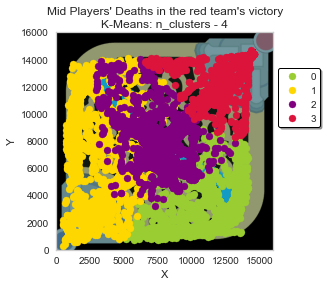

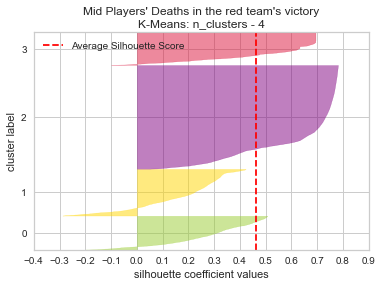

Silhouette score: 0.4646138810314583
2    4814
1    2166
0    1572
3    1496
Name: cluster, dtype: int64

Inertia: 8558.058338968593

Mean values for each cluster:


,cluster,coordinate_x,coordinate_y,timestamp
0,0,10487.202926,3525.676209,-0.054071
1,1,3721.906741,7415.475531,0.348569
2,2,7742.266099,7737.999585,-0.882426
3,3,13038.771390,13314.403743,-0.513369


In [49]:
# Apply K-means clustering
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(redSideVictoryDiscretized_df.to_numpy())

# Add the cluster labels to the original dataframe
redSideVictory_df["cluster"] = kmeans.labels_
profiling_df["cluster"] = kmeans.labels_

cluster_colors = np.array(["yellowgreen", "gold", "purple", "crimson"])
colors = visualizeResults(redSideVictory_df, redSideVictoryDiscretized_df.to_numpy(), kmeans, "red team's", kmeans, cluster_colors,"victory")

print("\nInertia: {}\n".format(kmeans.inertia_))

clusterMeanValues_df = clusterMeanValues(redSideVictory_df)
clusterMeanValues_df

In [42]:
clusterStandardDeviation_df = clusterStandardDeviation(redSideVictory_df)
clusterStandardDeviation_df

Standard deviation for each cluster:


,cluster,coordinate_x,coordinate_y,timestamp
0,0,2106.372234,2008.149230,0.644217
1,1,2096.233247,3576.685119,0.541803
2,2,1097.544307,1270.055087,0.322103
3,3,1710.213109,1444.359808,0.656993


In [43]:
clusterMinMaxValues_df = clusterMinMaxValues(redSideVictory_df)
clusterMinMaxValues_df

Max and Min values for each cluster:


,cluster,max coordinate_x,min coordinate_x,max coordinate_y,min coordinate_y,max timestamp,min timestamp
0,0,14117.0,4976.0,9593.0,734.0,1,-1
1,1,9806.0,510.0,14124.0,247.0,1,-1
2,2,13182.0,2916.0,14050.0,3234.0,0,-1
3,3,14539.0,6586.0,14673.0,8286.0,1,-1


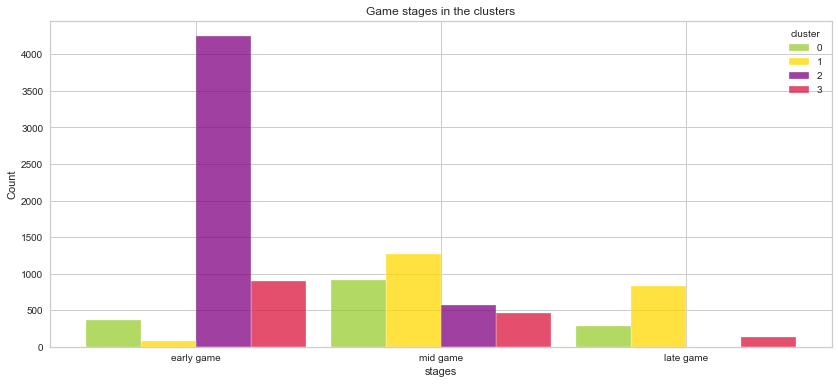

In [50]:
stagesPerClusterV2(redSideVictory_df, colors)

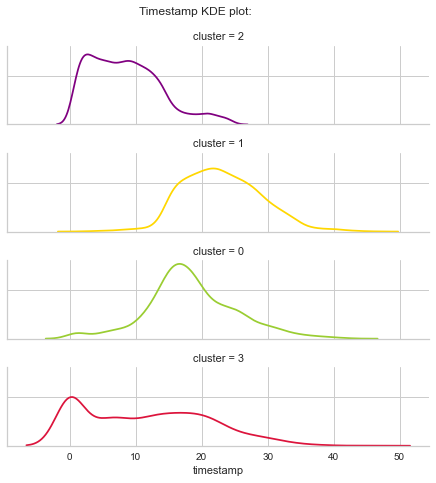

In [51]:
kdeTimestamp(profiling_df, cluster_colors)

K-Means with k = 5

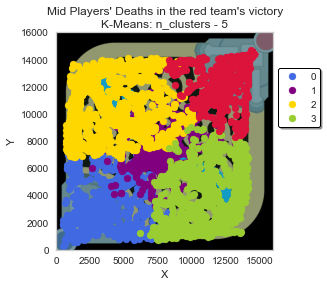

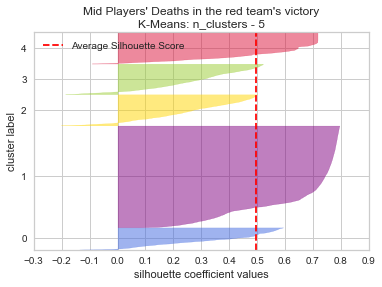

Silhouette score: 0.4980101192905641
1    4725
2    1441
4    1437
3    1414
0    1031
Name: cluster, dtype: int64

Inertia: 6475.924863168627

Mean values for each cluster:


,cluster,coordinate_x,coordinate_y,timestamp
0,0,3984.815713,3633.864210,0.564500
1,1,7806.171005,7553.421799,-0.879153
2,2,4103.541291,10419.258154,0.115892
3,3,10894.736209,3643.387553,-0.111740
4,4,13231.691719,13341.007655,-0.544885


In [54]:
# Apply K-means clustering
kmeans = KMeans(n_clusters=5, random_state=42)
kmeans.fit(redSideVictoryDiscretized_df.to_numpy())

# Add the cluster labels to the original dataframe
redSideVictory_df["cluster"] = kmeans.labels_
profiling_df["cluster"] = kmeans.labels_

cluster_colors = np.array(["royalblue", "purple", "gold", "yellowgreen", "crimson"])
colors = visualizeResults(redSideVictory_df, redSideVictoryDiscretized_df.to_numpy(), kmeans, "red team's", kmeans, cluster_colors,"victory")

print("\nInertia: {}\n".format(kmeans.inertia_))

clusterMeanValues_df = clusterMeanValues(redSideVictory_df)
clusterMeanValues_df

In [55]:
clusterStandardDeviation_df = clusterStandardDeviation(redSideVictory_df)
clusterStandardDeviation_df

Standard deviation for each cluster:


,cluster,coordinate_x,coordinate_y,timestamp
0,0,2152.005055,2036.245052,0.499719
1,1,973.773013,968.108313,0.325949
2,2,2308.513010,1947.728410,0.580534
3,3,1812.221543,2019.673612,0.629511
4,4,1420.775445,1427.625193,0.643124


In [56]:
clusterMinMaxValues_df = clusterMinMaxValues(redSideVictory_df)
clusterMinMaxValues_df

Max and Min values for each cluster:


,cluster,max coordinate_x,min coordinate_x,max coordinate_y,min coordinate_y,max timestamp,min timestamp
0,0,8255.0,510.0,7550.0,247.0,1,-1
1,1,13182.0,2627.0,13236.0,3234.0,0,-1
2,2,10185.0,735.0,14124.0,6749.0,1,-1
3,3,14117.0,6161.0,9053.0,734.0,1,-1
4,4,14539.0,8158.0,14673.0,8298.0,1,-1


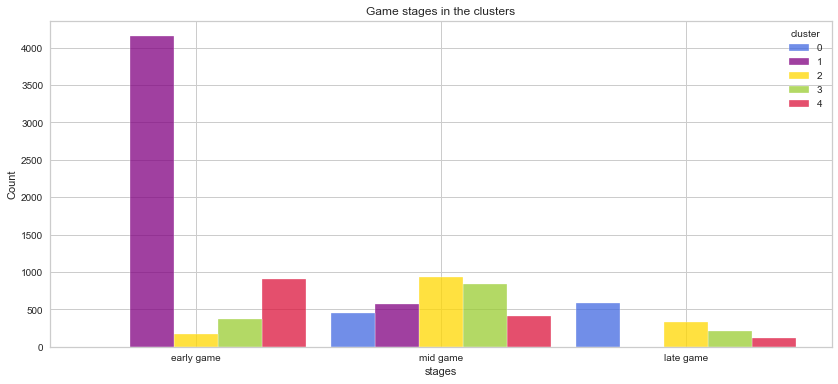

In [57]:
stagesPerClusterV2(redSideVictory_df, colors)

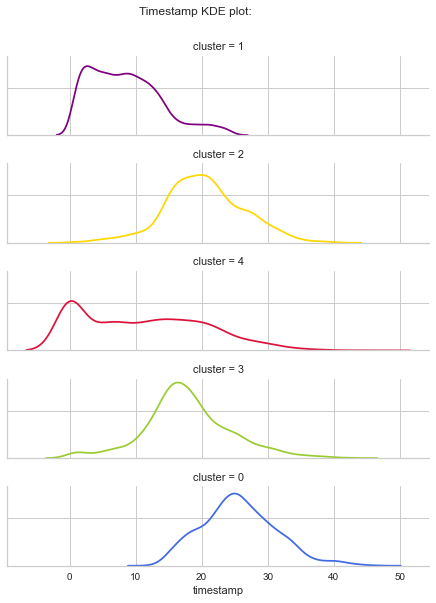

In [58]:
kdeTimestamp(profiling_df, cluster_colors)

Matches played with each champion:

In [46]:
champs = {}
for m in np.unique(profiling_df["gameId"]):
    temp_df = profiling_df[profiling_df["gameId"] == m]
    champs_df = np.unique(temp_df["champion"])
    #print(champs_df[0])
    try:
        champs[str(champs_df[0])] = champs[str(champs_df[0])] + 1
    except:
        champs[str(champs_df[0])] = 1
    #if(champ[champs_df[0]] =)
    #champ[champs_df[0]] = +1

print("Matches played with each champion:\n")
champs_df = pd.DataFrame.from_dict(champs, orient="index", columns=['matches'])
champs_df.sort_values(by=["matches"], ascending=False)
#print(champs)
    

Matches played with each champion:



,matches
AurelionSol,50
Jayce,30
Azir,27
Annie,25
Tristana,25
Zoe,24
Sylas,22
Cassiopeia,19
Akali,18
Syndra,17


Deaths with each champion:

In [47]:
print("Deaths with each champion:\n")
profiling_df["champion"].value_counts()

Deaths with each champion:



AurelionSol    1446
Jayce           784
Azir            701
Zoe             666
Tristana        655
Annie           649
Sylas           590
Akali           483
Syndra          481
Cassiopeia      460
Viktor          423
Taliyah         404
Orianna         351
Yone            285
Leblanc         278
Kassadin        243
Irelia          160
Ahri             99
Renekton         84
LeeSin           81
TwistedFate      80
Poppy            76
Lissandra        72
Galio            60
Gragas           52
Ryze             44
Lucian           36
Sion             34
Corki            28
Katarina         27
KSante           26
Swain            26
Velkoz           26
Xerath           26
Yasuo            25
Rumble           24
Vladimir         24
Tryndamere       20
Sett             19
Name: champion, dtype: int64

Number of deaths per champions in each cluster:

In [48]:
print("professional players played {} champions when they won on the red side\n".format(len(np.unique(profiling_df["champion"]))))
#print("{} was the champion with more deaths ({}) when pros win on the red side".format())
for cluster in np.unique(profiling_df["cluster"]):
    temp_df = profiling_df[profiling_df["cluster"] == cluster]
    print("Cluster {} - died with {} champions:\n {}".format(cluster,len(np.unique(temp_df["champion"])),np.unique(temp_df["champion"])))
    print("{}\n".format(temp_df["champion"].value_counts()))

professional players played 39 champions when they won on the red side

Cluster 0 - died with 36 champions:
 ['Ahri' 'Akali' 'Annie' 'AurelionSol' 'Azir' 'Cassiopeia' 'Corki' 'Galio'
 'Gragas' 'Irelia' 'Jayce' 'KSante' 'Kassadin' 'Katarina' 'Leblanc'
 'LeeSin' 'Lissandra' 'Lucian' 'Orianna' 'Poppy' 'Renekton' 'Rumble'
 'Ryze' 'Sion' 'Swain' 'Sylas' 'Syndra' 'Taliyah' 'Tristana' 'TwistedFate'
 'Velkoz' 'Viktor' 'Vladimir' 'Yasuo' 'Yone' 'Zoe']
AurelionSol    259
Jayce          129
Zoe            104
Sylas          102
Tristana        89
Annie           87
Azir            85
Akali           77
Cassiopeia      75
Syndra          71
Taliyah         67
Viktor          58
Orianna         55
Leblanc         48
Kassadin        42
Yone            39
TwistedFate     23
Irelia          21
Lissandra       19
Renekton        16
Ahri            16
Galio           15
LeeSin          13
Poppy           12
Katarina        10
Gragas           9
Ryze             8
Sion             5
KSante           4
Co

---
### Clustering Red Team Defeat

In [59]:
redSideDefeat_df = mid_deaths_df[(mid_deaths_df["team"] == "Red") & (mid_deaths_df["victory"] == False)]
redSideDefeat_df

,gameId,team,summoner,region,champion,timestamp,coordinate_x,coordinate_y,level,minionsKilled,...,trueDamageDoneToChampions,trueDamageTaken,victory,eventType,skillSlot,buildingType,lane,monster,itemName,role
13675,EUW1_6273554065,Red,anonymous 52,euw1,Syndra,0.000000,14398.0,14582.0,1.0,0.0,...,0.0,0.0,False,NaN,NaN,NaN,NaN,NaN,NaN,MIDDLE
13676,EUW1_6273554065,Red,anonymous 52,euw1,Syndra,1.000133,11446.0,5986.0,1.0,0.0,...,0.0,0.0,False,NaN,NaN,NaN,NaN,NaN,NaN,MIDDLE
13678,EUW1_6273554065,Red,anonymous 52,euw1,Syndra,2.000367,7817.0,7527.0,1.0,5.0,...,0.0,0.0,False,NaN,NaN,NaN,NaN,NaN,NaN,MIDDLE
13679,EUW1_6273554065,Red,anonymous 52,euw1,Syndra,3.000583,7214.0,7070.0,3.0,17.0,...,0.0,0.0,False,NaN,NaN,NaN,NaN,NaN,NaN,MIDDLE
13682,EUW1_6273554065,Red,anonymous 52,euw1,Syndra,4.000783,7971.0,8191.0,4.0,28.0,...,0.0,0.0,False,NaN,NaN,NaN,NaN,NaN,NaN,MIDDLE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279138,KR_6376021134,Red,anonymous 78,kr,Viktor,23.006350,14116.0,10834.0,14.0,179.0,...,0.0,914.0,False,NaN,NaN,NaN,NaN,NaN,NaN,MIDDLE
279141,KR_6376021134,Red,anonymous 78,kr,Viktor,24.006833,8799.0,8262.0,14.0,183.0,...,0.0,914.0,False,NaN,NaN,NaN,NaN,NaN,NaN,MIDDLE
279142,KR_6376021134,Red,anonymous 78,kr,Viktor,25.007283,2285.0,12533.0,14.0,194.0,...,0.0,914.0,False,NaN,NaN,NaN,NaN,NaN,NaN,MIDDLE
279143,KR_6376021134,Red,anonymous 78,kr,Viktor,26.007550,5648.0,14080.0,14.0,199.0,...,0.0,1041.0,False,NaN,NaN,NaN,NaN,NaN,NaN,MIDDLE


In [60]:
profiling_df = mid_deaths_df[(mid_deaths_df["team"] == "Red") & (mid_deaths_df["victory"] == False)].copy()

In [61]:
winRateRedSide = (redSideDefeat_df.shape[0]/ redSide_mid_deaths_df.shape[0]) * 100
winRateRedSide

45.20368653542019

In [62]:
players_df = np.unique(redSideDefeat_df["summoner"])
for player in players_df:
    temp_df = redSideDefeat_df[redSideDefeat_df["summoner"] == player]
    print("{} lost {} matches on the red side".format(player, len(np.unique(temp_df["gameId"]))))
    print("{} has an average of {} deaths per game when losing on the red side\n".format(player, temp_df.shape[0]/len(np.unique(temp_df["gameId"]))))

anonymous 52 lost 26 matches on the red side
anonymous 52 has an average of 26.46153846153846 deaths per game when losing on the red side

anonymous 53 lost 22 matches on the red side
anonymous 53 has an average of 25.818181818181817 deaths per game when losing on the red side

anonymous 54 lost 22 matches on the red side
anonymous 54 has an average of 26.227272727272727 deaths per game when losing on the red side

anonymous 56 lost 15 matches on the red side
anonymous 56 has an average of 26.933333333333334 deaths per game when losing on the red side

anonymous 57 lost 35 matches on the red side
anonymous 57 has an average of 27.142857142857142 deaths per game when losing on the red side

anonymous 58 lost 10 matches on the red side
anonymous 58 has an average of 29.6 deaths per game when losing on the red side

anonymous 59 lost 13 matches on the red side
anonymous 59 has an average of 24.923076923076923 deaths per game when losing on the red side

anonymous 60 lost 15 matches on the

In [64]:
print("Defeat games on red side contains {} matches in which the mid died at least once".format(len(np.unique(redSideDefeat_df["gameId"]))))

print("{} players died a total of {} times on the red side".format(len(np.unique(redSideDefeat_df["summoner"])), redSideDefeat_df.shape[0]))

print("Defeat games on red side contains an average of {} deaths per game".format((redSideDefeat_df.shape[0]/len(np.unique(redSideDefeat_df["gameId"])))))

Defeat games on red side contains 306 matches in which the mid died at least once
19 players died a total of 8289 times on the red side
Defeat games on red side contains an average of 27.08823529411765 deaths per game


In [65]:
redSideDefeat_df = redSideDefeat_df[["coordinate_x","coordinate_y","timestamp"]].copy()
redSideDefeat_df

,coordinate_x,coordinate_y,timestamp
13675,14398.0,14582.0,0.000000
13676,11446.0,5986.0,1.000133
13678,7817.0,7527.0,2.000367
13679,7214.0,7070.0,3.000583
13682,7971.0,8191.0,4.000783
...,...,...,...
279138,14116.0,10834.0,23.006350
279141,8799.0,8262.0,24.006833
279142,2285.0,12533.0,25.007283
279143,5648.0,14080.0,26.007550


Time discretization

In [66]:
redSideDefeat_df["timestamp"] = redSideDefeat_df["timestamp"].apply(float)
redSideDefeat_df["timestamp"] = pd.cut(redSideDefeat_df["timestamp"],
       bins=[-1, 15, 25, 60],
       labels=["-1", "0", "1"])

In [67]:
np.unique(redSideDefeat_df["timestamp"])

array(['-1', '0', '1'], dtype=object)

In [68]:
redSideDefeat_df["timestamp"] = redSideDefeat_df["timestamp"].astype(int)

Normalize Data:

In [69]:
redSideDefeatDiscretized_df = redSideDefeat_df.copy()

In [70]:
scaler = StandardScaler()
redSideDefeatDiscretized_df[["coordinate_x", "coordinate_y"]] = scaler.fit_transform(redSideDefeat_df[["coordinate_x", "coordinate_y"]])
redSideDefeatDiscretized_df

,coordinate_x,coordinate_y,timestamp
13675,1.704593,1.813283,-1
13676,0.760100,-0.905167,-1
13678,-0.400999,-0.417832,-1
13679,-0.593929,-0.562356,-1
13682,-0.351727,-0.207845,-1
...,...,...,...
279138,1.614367,0.627993,0
279141,-0.086808,-0.185391,0
279142,-2.170963,1.165295,1
279143,-1.094971,1.654528,1


In [71]:
for k in [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 25]:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(redSideDefeatDiscretized_df.to_numpy())
    
    print("Silhouette score for k={}: {}".format(k, silhouette_score(redSideDefeatDiscretized_df.to_numpy(), kmeans.labels_)))

Silhouette score for k=2: 0.4107637343587281
Silhouette score for k=3: 0.43317267498064843
Silhouette score for k=4: 0.4761575602304712
Silhouette score for k=5: 0.4749833725163781
Silhouette score for k=6: 0.4686993220856677
Silhouette score for k=7: 0.47115988449809754
Silhouette score for k=8: 0.4756891753930576
Silhouette score for k=9: 0.4731230920098158
Silhouette score for k=10: 0.35331966959632166
Silhouette score for k=11: 0.4733019623896806
Silhouette score for k=12: 0.3632932661587409
Silhouette score for k=13: 0.47330543021559446
Silhouette score for k=14: 0.3637763591673878
Silhouette score for k=15: 0.472741298336066
Silhouette score for k=16: 0.3704084558226081
Silhouette score for k=17: 0.3742905176046624
Silhouette score for k=18: 0.3907095932229808
Silhouette score for k=19: 0.3928997173447643
Silhouette score for k=20: 0.38751500231233743
Silhouette score for k=25: 0.420213228356246


K-Means with k = 4

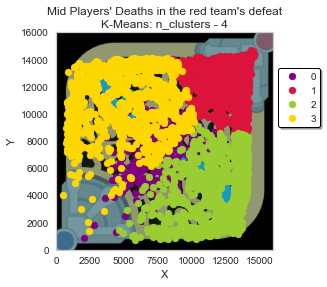

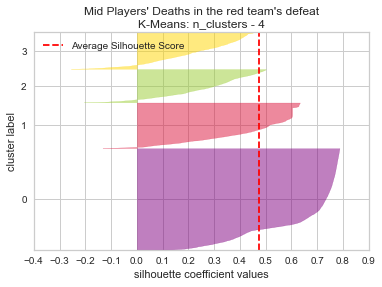

Silhouette score: 0.4761575602304712
0    3886
1    1743
3    1386
2    1274
Name: cluster, dtype: int64

Inertia: 6730.313698613156

Mean values for each cluster:


,cluster,coordinate_x,coordinate_y,timestamp
0,0,7886.294133,7696.743181,-0.865929
1,1,12915.554217,12854.144005,-0.220884
2,2,11620.400314,4624.748823,-0.127159
3,3,5210.327561,10921.132035,0.226551


In [73]:
# Apply K-means clustering
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(redSideDefeatDiscretized_df.to_numpy())

# Add the cluster labels to the original dataframe
redSideDefeat_df["cluster"] = kmeans.labels_

profiling_df["cluster"] = kmeans.labels_

cluster_colors = np.array(["purple", "crimson", "yellowgreen", "gold"])
colors = visualizeResults(redSideDefeat_df, redSideDefeatDiscretized_df.to_numpy(), kmeans, "red team's", kmeans, cluster_colors,"defeat")

print("\nInertia: {}\n".format(kmeans.inertia_))

clusterMeanValues_df = clusterMeanValues(redSideDefeat_df)
clusterMeanValues_df

In [74]:
clusterStandardDeviation_df = clusterStandardDeviation(redSideDefeat_df)
clusterStandardDeviation_df

Standard deviation for each cluster:


,cluster,coordinate_x,coordinate_y,timestamp
0,0,994.004027,1014.441353,0.340729
1,1,1485.309440,1610.218741,0.758187
2,2,1859.357049,2152.261587,0.644625
3,3,2509.454330,2191.544911,0.605925


In [75]:
clusterMinMaxValues_df = clusterMinMaxValues(redSideDefeat_df)
clusterMinMaxValues_df

Max and Min values for each cluster:


,cluster,max coordinate_x,min coordinate_x,max coordinate_y,min coordinate_y,max timestamp,min timestamp
0,0,12048.0,2051.0,12264.0,888.0,0,-1
1,1,14581.0,8264.0,14673.0,8524.0,1,-1
2,2,14129.0,4611.0,9097.0,734.0,1,-1
3,3,10171.0,524.0,14132.0,1406.0,1,-1


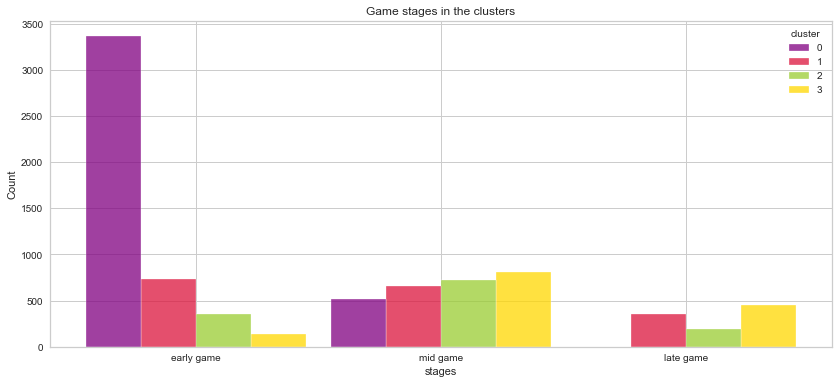

In [76]:
stagesPerClusterV2(redSideDefeat_df, colors)

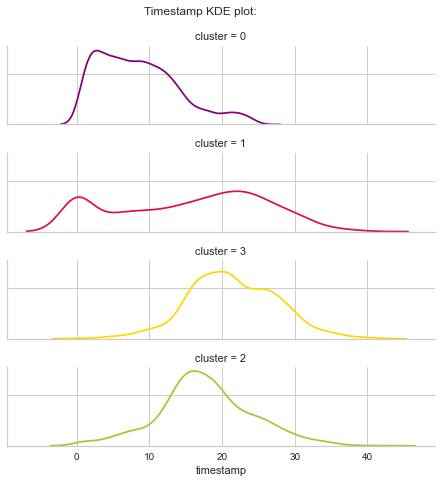

In [77]:
kdeTimestamp(profiling_df, cluster_colors)

Matches played with each champion:

In [79]:
champs = {}
for m in np.unique(profiling_df["gameId"]):
    temp_df = profiling_df[profiling_df["gameId"] == m]
    champs_df = np.unique(temp_df["champion"])
    #print(champs_df[0])
    try:
        champs[str(champs_df[0])] = champs[str(champs_df[0])] + 1
    except:
        champs[str(champs_df[0])] = 1
    #if(champ[champs_df[0]] =)
    #champ[champs_df[0]] = +1

print("Matches played with each champion:\n")
champs_df = pd.DataFrame.from_dict(champs, orient="index", columns=['matches'])
champs_df.sort_values(by=["matches"], ascending=False)
#print(champs)
    

Matches played with each champion:



,matches
AurelionSol,34
Tristana,29
Azir,24
Sylas,23
Syndra,18
Akali,18
Jayce,18
Viktor,14
Annie,13
Taliyah,12


Deaths with each champion:

In [80]:
print("Deaths with each champion:\n")
profiling_df["champion"].value_counts()

Deaths with each champion:



AurelionSol    980
Tristana       766
Azir           611
Sylas          587
Syndra         485
Akali          479
Jayce          465
Viktor         403
Taliyah        355
Annie          346
Leblanc        323
Orianna        279
Yone           268
Irelia         243
Cassiopeia     235
Zoe            217
Ryze           191
Gragas         156
Kassadin       139
Ezreal         117
Renekton       112
LeeSin          82
Rumble          72
Karma           60
Corki           54
Xerath          38
Lissandra       32
Rakan           31
Varus           26
Vi              25
Zeri            25
Yasuo           24
Swain           23
KogMaw          22
Ahri            18
Name: champion, dtype: int64

Number of deaths per champions in each cluster:

In [81]:
print("professional players played {} champions when they won on the red side\n".format(len(np.unique(profiling_df["champion"]))))
#print("{} was the champion with more deaths ({}) when pros win on the red side".format())
for cluster in np.unique(profiling_df["cluster"]):
    temp_df = profiling_df[profiling_df["cluster"] == cluster]
    print("Cluster {} - died with {} champions:\n {}".format(cluster,len(np.unique(temp_df["champion"])),np.unique(temp_df["champion"])))
    print("{}\n".format(temp_df["champion"].value_counts()))

professional players played 35 champions when they won on the red side

Cluster 0 - died with 35 champions:
 ['Ahri' 'Akali' 'Annie' 'AurelionSol' 'Azir' 'Cassiopeia' 'Corki' 'Ezreal'
 'Gragas' 'Irelia' 'Jayce' 'Karma' 'Kassadin' 'KogMaw' 'Leblanc' 'LeeSin'
 'Lissandra' 'Orianna' 'Rakan' 'Renekton' 'Rumble' 'Ryze' 'Swain' 'Sylas'
 'Syndra' 'Taliyah' 'Tristana' 'Varus' 'Vi' 'Viktor' 'Xerath' 'Yasuo'
 'Yone' 'Zeri' 'Zoe']
AurelionSol    109
Tristana        93
Azir            75
Sylas           72
Akali           55
Jayce           52
Syndra          47
Viktor          47
Annie           43
Orianna         41
Taliyah         40
Leblanc         34
Yone            34
Irelia          32
Zoe             26
Cassiopeia      25
Ryze            24
Gragas          15
Kassadin        14
Renekton        12
LeeSin          10
Ezreal          10
Vi               6
Rumble           6
Xerath           5
Corki            5
Ahri             4
KogMaw           4
Yasuo            4
Varus            4
Zeri  

---
### Clustering Blue Team Victory

In [82]:
blueSideVictory_df = mid_deaths_df[(mid_deaths_df["team"] == "Blue") & (mid_deaths_df["victory"] == True)]
blueSideVictory_df

,gameId,team,summoner,region,champion,timestamp,coordinate_x,coordinate_y,level,minionsKilled,...,trueDamageDoneToChampions,trueDamageTaken,victory,eventType,skillSlot,buildingType,lane,monster,itemName,role
13996,EUW1_6272070095,Blue,anonymous 52,euw1,Sylas,0.000000,335.0,269.0,1.0,0.0,...,0.0,0.0,True,NaN,NaN,NaN,NaN,NaN,NaN,MIDDLE
13997,EUW1_6272070095,Blue,anonymous 52,euw1,Sylas,1.000250,8166.0,3488.0,1.0,0.0,...,16.0,0.0,True,NaN,NaN,NaN,NaN,NaN,NaN,MIDDLE
13999,EUW1_6272070095,Blue,anonymous 52,euw1,Sylas,2.000367,7432.0,6035.0,2.0,6.0,...,28.0,0.0,True,NaN,NaN,NaN,NaN,NaN,NaN,MIDDLE
14001,EUW1_6272070095,Blue,anonymous 52,euw1,Sylas,3.000483,7791.0,7858.0,3.0,18.0,...,51.0,0.0,True,NaN,NaN,NaN,NaN,NaN,NaN,MIDDLE
14004,EUW1_6272070095,Blue,anonymous 52,euw1,Sylas,4.000867,7567.0,7719.0,4.0,27.0,...,55.0,0.0,True,NaN,NaN,NaN,NaN,NaN,NaN,MIDDLE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
278808,KR_6375935085,Blue,anonymous 75,kr,Viktor,26.007983,3219.0,5725.0,14.0,157.0,...,0.0,725.0,True,NaN,NaN,NaN,NaN,NaN,NaN,MIDDLE
278810,KR_6375935085,Blue,anonymous 75,kr,Viktor,27.008067,3685.0,6498.0,14.0,165.0,...,0.0,725.0,True,NaN,NaN,NaN,NaN,NaN,NaN,MIDDLE
278812,KR_6375935085,Blue,anonymous 75,kr,Viktor,28.008350,3507.0,2153.0,15.0,170.0,...,0.0,725.0,True,NaN,NaN,NaN,NaN,NaN,NaN,MIDDLE
278815,KR_6375935085,Blue,anonymous 75,kr,Viktor,29.008717,11413.0,11367.0,15.0,176.0,...,0.0,725.0,True,NaN,NaN,NaN,NaN,NaN,NaN,MIDDLE


In [83]:
profiling_df = mid_deaths_df[(mid_deaths_df["team"] == "Blue") & (mid_deaths_df["victory"] == True)].copy()

In [84]:
winsBlueSide = len(np.unique(blueSideVictory_df["gameId"]))

In [85]:
winRateRedSide = (winsBlueSide / gamesBlueSide) * 100
winRateRedSide

48.86128364389234

In [86]:
winRateBlueSide = (blueSideVictory_df.shape[0]/ blueSide_mid_deaths_df.shape[0]) * 100
winRateBlueSide

48.34638485516612

In [87]:
players_df = np.unique(blueSideVictory_df["summoner"])
for player in players_df:
    temp_df = blueSideVictory_df[blueSideVictory_df["summoner"] == player]
    print("{} won {} matches on the blue side".format(player, len(np.unique(temp_df["gameId"]))))
    print("{} has an average of {} deaths per game when winning on the blue side\n".format(player, temp_df.shape[0]/len(np.unique(temp_df["gameId"]))))

anonymous 52 won 24 matches on the blue side
anonymous 52 has an average of 30.416666666666668 deaths per game when winning on the blue side

anonymous 53 won 17 matches on the blue side
anonymous 53 has an average of 26.470588235294116 deaths per game when winning on the blue side

anonymous 54 won 20 matches on the blue side
anonymous 54 has an average of 29.45 deaths per game when winning on the blue side

anonymous 56 won 8 matches on the blue side
anonymous 56 has an average of 26.5 deaths per game when winning on the blue side

anonymous 57 won 33 matches on the blue side
anonymous 57 has an average of 26.727272727272727 deaths per game when winning on the blue side

anonymous 58 won 5 matches on the blue side
anonymous 58 has an average of 29.2 deaths per game when winning on the blue side

anonymous 59 won 7 matches on the blue side
anonymous 59 has an average of 22.142857142857142 deaths per game when winning on the blue side

anonymous 60 won 12 matches on the blue side
anony

In [88]:
print("Victory games on blue side contains {} matches in which the jungler died at least once".format(len(np.unique(blueSideVictory_df["gameId"]))))

print("{} players died a total of {} times on the blue side".format(len(np.unique(blueSideVictory_df["summoner"])), blueSideVictory_df.shape[0]))

print("Victory games on blue side contains an average of {} deaths per game".format((blueSideVictory_df.shape[0]/len(np.unique(blueSideVictory_df["gameId"])))))

Victory games on blue side contains 236 matches in which the jungler died at least once
19 players died a total of 6359 times on the blue side
Victory games on blue side contains an average of 26.944915254237287 deaths per game


In [89]:
blueSideVictory_df = blueSideVictory_df[["coordinate_x","coordinate_y","timestamp"]].copy()
blueSideVictory_df

,coordinate_x,coordinate_y,timestamp
13996,335.0,269.0,0.000000
13997,8166.0,3488.0,1.000250
13999,7432.0,6035.0,2.000367
14001,7791.0,7858.0,3.000483
14004,7567.0,7719.0,4.000867
...,...,...,...
278808,3219.0,5725.0,26.007983
278810,3685.0,6498.0,27.008067
278812,3507.0,2153.0,28.008350
278815,11413.0,11367.0,29.008717


Time discretization

In [90]:
blueSideVictory_df["timestamp"] = blueSideVictory_df["timestamp"].apply(float)
blueSideVictory_df["timestamp"] = pd.cut(blueSideVictory_df["timestamp"],
       bins=[-1, 15, 25, 60],
       labels=["-1", "0", "1"])

In [91]:
np.unique(blueSideVictory_df["timestamp"])

array(['-1', '0', '1'], dtype=object)

In [92]:
blueSideVictory_df["timestamp"] = blueSideVictory_df["timestamp"].astype(int)

Normalize Data:

In [93]:
blueSideVictoryDiscretized_df = blueSideVictory_df.copy()

In [94]:
scaler = StandardScaler()
blueSideVictoryDiscretized_df[["coordinate_x", "coordinate_y"]] = scaler.fit_transform(blueSideVictory_df[["coordinate_x", "coordinate_y"]])
blueSideVictoryDiscretized_df

,coordinate_x,coordinate_y,timestamp
13996,-1.912569,-1.921651,-1
13997,0.354001,-0.972723,-1
13999,0.141556,-0.221893,-1
14001,0.245463,0.315509,-1
14004,0.180629,0.274533,-1
...,...,...,...
278808,-1.077837,-0.313278,1
278810,-0.942960,-0.085405,1
278812,-0.994479,-1.366267,1
278815,1.293799,1.349926,1


In [95]:
for k in [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 25]:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(blueSideVictoryDiscretized_df.to_numpy())
    
    print("Silhouette score for k={}: {}".format(k, silhouette_score(blueSideVictoryDiscretized_df.to_numpy(), kmeans.labels_)))

Silhouette score for k=2: 0.4366782742574101
Silhouette score for k=3: 0.417665483769367
Silhouette score for k=4: 0.4527281176111316
Silhouette score for k=5: 0.4927738808030351
Silhouette score for k=6: 0.501456780465653
Silhouette score for k=7: 0.49419697760589226
Silhouette score for k=8: 0.48940609040368227
Silhouette score for k=9: 0.4894565384318631
Silhouette score for k=10: 0.47485622903041924
Silhouette score for k=11: 0.48935720157301704
Silhouette score for k=12: 0.4898000733647512
Silhouette score for k=13: 0.494790042821477
Silhouette score for k=14: 0.4876867128260949
Silhouette score for k=15: 0.383356291266623
Silhouette score for k=16: 0.3855172238367385
Silhouette score for k=17: 0.3885467228770439
Silhouette score for k=18: 0.3806754011423833
Silhouette score for k=19: 0.3861724892065138
Silhouette score for k=20: 0.38499014883251115
Silhouette score for k=25: 0.41279132496839477


K-Means with k = 4

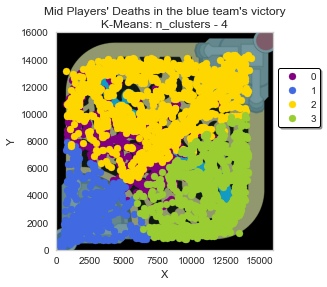

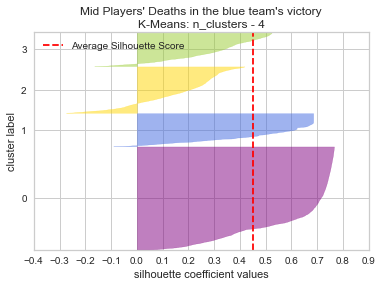

Silhouette score: 0.4527281176111316
0    3037
2    1368
3     983
1     971
Name: cluster, dtype: int64

Inertia: 5559.10365412851

Mean values for each cluster:


,cluster,coordinate_x,coordinate_y,timestamp
0,0,6849.694435,7264.730655,-0.868291
1,1,1662.092688,1726.742533,-0.495366
2,2,7757.115497,11019.156433,0.366959
3,3,11314.255341,4424.441506,-0.137335


In [97]:
# Apply K-means clustering
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(blueSideVictoryDiscretized_df.to_numpy())

# Add the cluster labels to the original dataframe
blueSideVictory_df["cluster"] = kmeans.labels_
profiling_df["cluster"] = kmeans.labels_

cluster_colors = np.array(["purple", "royalblue", "gold", "yellowgreen"])
colors = visualizeResults(blueSideVictory_df, blueSideVictoryDiscretized_df.to_numpy(), kmeans, "blue team's", kmeans, cluster_colors,"victory")

print("\nInertia: {}\n".format(kmeans.inertia_))

clusterMeanValues_df = clusterMeanValues(blueSideVictory_df)
clusterMeanValues_df

In [98]:
clusterStandardDeviation_df = clusterStandardDeviation(blueSideVictory_df)
clusterStandardDeviation_df

Standard deviation for each cluster:


,cluster,coordinate_x,coordinate_y,timestamp
0,0,1413.379001,1156.580132,0.338174
1,1,1530.381075,1655.455751,0.681315
2,2,3562.304776,2144.706715,0.541944
3,3,1862.852048,2166.316213,0.628632


In [99]:
clusterMinMaxValues_df = clusterMinMaxValues(blueSideVictory_df)
clusterMinMaxValues_df

Max and Min values for each cluster:


,cluster,max coordinate_x,min coordinate_x,max coordinate_y,min coordinate_y,max timestamp,min timestamp
0,0,11983.0,775.0,13140.0,3159.0,0,-1
1,1,7223.0,194.0,7945.0,269.0,1,-1
2,2,14373.0,774.0,14356.0,5153.0,1,-1
3,3,14137.0,5904.0,9929.0,817.0,1,-1


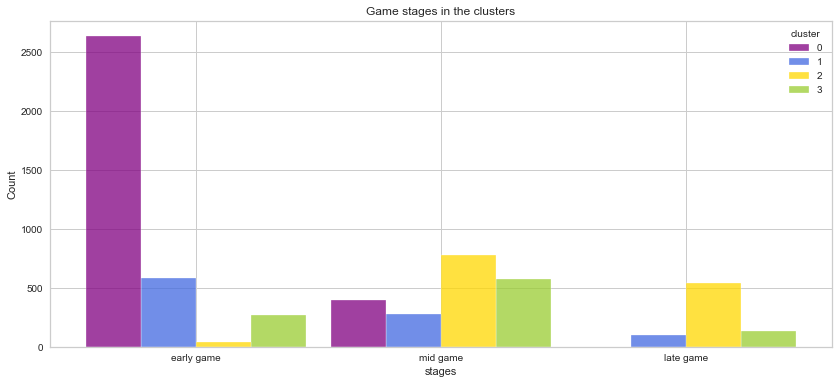

In [100]:
stagesPerClusterV2(blueSideVictory_df, colors)

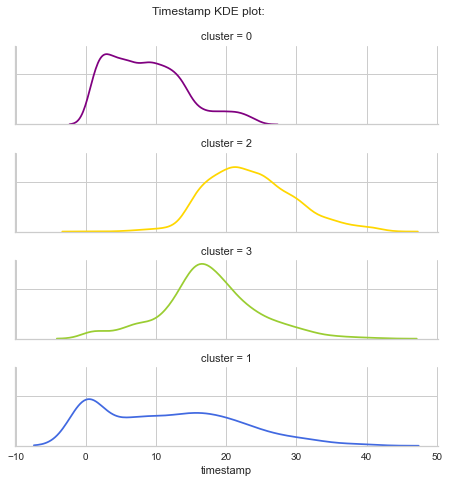

In [101]:
kdeTimestamp(profiling_df, cluster_colors)

K-Means with k = 5

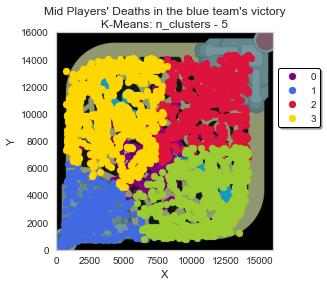

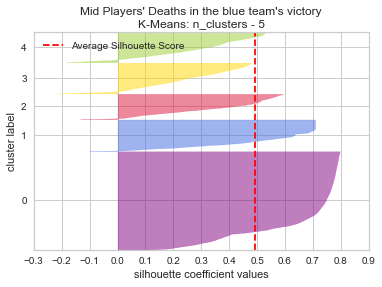

Silhouette score: 0.4927738808030351
0    2898
1     930
3     910
4     873
2     748
Name: cluster, dtype: int64

Inertia: 4134.688111688863

Mean values for each cluster:


,cluster,coordinate_x,coordinate_y,timestamp
0,0,7144.432022,7125.329883,-0.882333
1,1,1597.424731,1560.903226,-0.530108
2,2,11130.600267,10769.145722,0.493316
3,3,4259.452747,10506.804396,0.091209
4,4,11177.664376,3946.995418,-0.175258


In [103]:
# Apply K-means clustering
kmeans = KMeans(n_clusters=5, random_state=42)
kmeans.fit(blueSideVictoryDiscretized_df.to_numpy())

# Add the cluster labels to the original dataframe
blueSideVictory_df["cluster"] = kmeans.labels_
profiling_df["cluster"] = kmeans.labels_

cluster_colors = np.array(["purple", "royalblue", "crimson", "gold", "yellowgreen"])
colors = visualizeResults(blueSideVictory_df, blueSideVictoryDiscretized_df.to_numpy(), kmeans, "blue team's", kmeans, cluster_colors,"victory")

print("\nInertia: {}\n".format(kmeans.inertia_))

clusterMeanValues_df = clusterMeanValues(blueSideVictory_df)
clusterMeanValues_df

In [104]:
clusterStandardDeviation_df = clusterStandardDeviation(blueSideVictory_df)
clusterStandardDeviation_df

Standard deviation for each cluster:


,cluster,coordinate_x,coordinate_y,timestamp
0,0,972.787856,941.959070,0.322214
1,1,1467.434252,1417.575383,0.666928
2,2,1911.915394,2137.907694,0.513151
3,3,1870.031851,2351.817846,0.601673
4,4,1922.989837,1871.171695,0.627898


In [105]:
clusterMinMaxValues_df = clusterMinMaxValues(blueSideVictory_df)
clusterMinMaxValues_df

Max and Min values for each cluster:


,cluster,max coordinate_x,min coordinate_x,max coordinate_y,min coordinate_y,max timestamp,min timestamp
0,0,11605.0,1854.0,11917.0,3159.0,0,-1
1,1,6644.0,194.0,6340.0,269.0,1,-1
2,2,14373.0,7142.0,14356.0,6416.0,1,-1
3,3,8164.0,774.0,14110.0,4593.0,1,-1
4,4,14137.0,5904.0,7546.0,817.0,1,-1


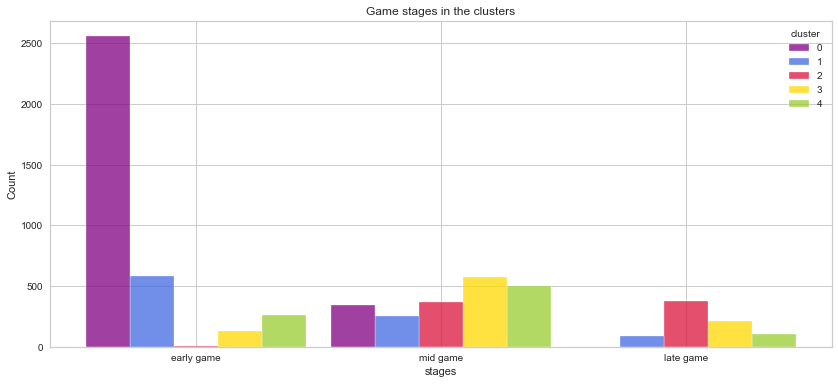

In [106]:
stagesPerClusterV2(blueSideVictory_df, colors)

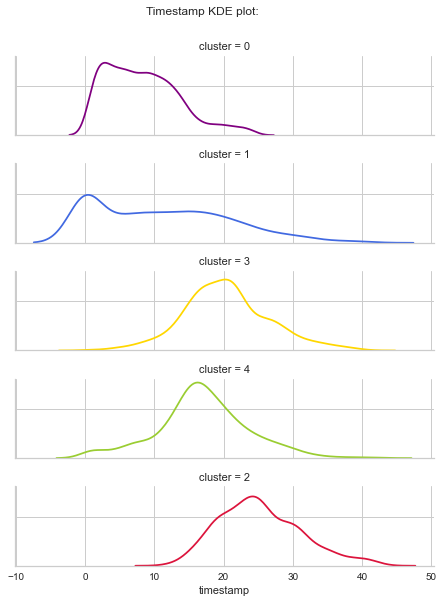

In [107]:
kdeTimestamp(profiling_df, cluster_colors)

Matches played with each champion:

In [108]:
champs = {}
for m in np.unique(profiling_df["gameId"]):
    temp_df = profiling_df[profiling_df["gameId"] == m]
    champs_df = np.unique(temp_df["champion"])
    #print(champs_df[0])
    try:
        champs[str(champs_df[0])] = champs[str(champs_df[0])] + 1
    except:
        champs[str(champs_df[0])] = 1
    #if(champ[champs_df[0]] =)
    #champ[champs_df[0]] = +1

print("Matches played with each champion:\n")
champs_df = pd.DataFrame.from_dict(champs, orient="index", columns=['matches'])
champs_df.sort_values(by=["matches"], ascending=False)
#print(champs)
    

Matches played with each champion:



,matches
AurelionSol,26
Tristana,23
Jayce,22
Akali,18
Viktor,17
Annie,16
Sylas,15
Syndra,13
Azir,12
Leblanc,11


Deaths with each champion:

In [109]:
print("Deaths with each champion:\n")
profiling_df["champion"].value_counts()

Deaths with each champion:



AurelionSol    695
Tristana       620
Jayce          605
Akali          505
Viktor         479
Annie          424
Sylas          415
Azir           335
Syndra         332
Zoe            264
Leblanc        263
Cassiopeia     219
Orianna        148
Yone           128
Taliyah        101
Lissandra       97
Ezreal          89
Irelia          78
Yasuo           64
Vex             61
Gragas          54
LeeSin          51
Aatrox          50
Varus           36
Kassadin        36
Rumble          30
Sejuani         29
Swain           28
Renekton        26
Ahri            24
KogMaw          23
Seraphine       19
Zed             17
Galio           14
Name: champion, dtype: int64

Number of deaths per champions in each cluster:

In [110]:
print("professional players played {} champions when they won on the red side\n".format(len(np.unique(profiling_df["champion"]))))
#print("{} was the champion with more deaths ({}) when pros win on the red side".format())
for cluster in np.unique(profiling_df["cluster"]):
    temp_df = profiling_df[profiling_df["cluster"] == cluster]
    print("Cluster {} - died with {} champions:\n {}".format(cluster,len(np.unique(temp_df["champion"])),np.unique(temp_df["champion"])))
    print("{}\n".format(temp_df["champion"].value_counts()))

professional players played 34 champions when they won on the red side

Cluster 0 - died with 34 champions:
 ['Aatrox' 'Ahri' 'Akali' 'Annie' 'AurelionSol' 'Azir' 'Cassiopeia'
 'Ezreal' 'Galio' 'Gragas' 'Irelia' 'Jayce' 'Kassadin' 'KogMaw' 'Leblanc'
 'LeeSin' 'Lissandra' 'Orianna' 'Renekton' 'Rumble' 'Sejuani' 'Seraphine'
 'Swain' 'Sylas' 'Syndra' 'Taliyah' 'Tristana' 'Varus' 'Vex' 'Viktor'
 'Yasuo' 'Yone' 'Zed' 'Zoe']
AurelionSol    314
Tristana       274
Jayce          264
Akali          207
Viktor         202
Annie          201
Azir           175
Sylas          171
Syndra         170
Leblanc        138
Zoe            132
Cassiopeia     101
Orianna         71
Yone            63
Taliyah         48
Ezreal          45
Lissandra       38
Irelia          34
Vex             28
Gragas          25
Yasuo           24
Aatrox          24
LeeSin          20
Swain           16
Varus           14
Sejuani         14
KogMaw          13
Kassadin        13
Rumble          11
Seraphine       11
Renekto

---
### Clustering Blue Team Defeat

In [111]:
blueSideDefeat_df = mid_deaths_df[(mid_deaths_df["team"] == "Blue") & (mid_deaths_df["victory"] == False)]
blueSideDefeat_df

,gameId,team,summoner,region,champion,timestamp,coordinate_x,coordinate_y,level,minionsKilled,...,trueDamageDoneToChampions,trueDamageTaken,victory,eventType,skillSlot,buildingType,lane,monster,itemName,role
13823,EUW1_6273050720,Blue,anonymous 52,euw1,Sylas,0.000000,194.0,457.0,1.0,0.0,...,0.0,0.0,False,NaN,NaN,NaN,NaN,NaN,NaN,MIDDLE
13824,EUW1_6273050720,Blue,anonymous 52,euw1,Sylas,1.000417,6397.0,6400.0,1.0,0.0,...,0.0,0.0,False,NaN,NaN,NaN,NaN,NaN,NaN,MIDDLE
13825,EUW1_6273050720,Blue,anonymous 52,euw1,Sylas,2.000700,7260.0,7081.0,1.0,3.0,...,0.0,0.0,False,NaN,NaN,NaN,NaN,NaN,NaN,MIDDLE
13827,EUW1_6273050720,Blue,anonymous 52,euw1,Sylas,3.000967,6228.0,6334.0,3.0,15.0,...,5.0,0.0,False,NaN,NaN,NaN,NaN,NaN,NaN,MIDDLE
13830,EUW1_6273050720,Blue,anonymous 52,euw1,Sylas,4.001033,652.0,512.0,4.0,28.0,...,5.0,0.0,False,NaN,NaN,NaN,NaN,NaN,NaN,MIDDLE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
278930,KR_6375941718,Blue,anonymous 76,kr,Vex,23.007917,8598.0,7492.0,13.0,124.0,...,834.0,582.0,False,NaN,NaN,NaN,NaN,NaN,NaN,MIDDLE
278933,KR_6375941718,Blue,anonymous 76,kr,Vex,24.007950,2014.0,9610.0,13.0,124.0,...,834.0,582.0,False,NaN,NaN,NaN,NaN,NaN,NaN,MIDDLE
278934,KR_6375941718,Blue,anonymous 76,kr,Vex,25.008350,4355.0,5101.0,13.0,135.0,...,1082.0,642.0,False,NaN,NaN,NaN,NaN,NaN,NaN,MIDDLE
278937,KR_6375941718,Blue,anonymous 76,kr,Vex,26.008483,4695.0,2876.0,14.0,139.0,...,1082.0,642.0,False,NaN,NaN,NaN,NaN,NaN,NaN,MIDDLE


In [112]:
profiling_df = mid_deaths_df[(mid_deaths_df["team"] == "Blue") & (mid_deaths_df["victory"] == False)].copy()

In [113]:
winRateBlueSide = (blueSideDefeat_df.shape[0]/ blueSide_mid_deaths_df.shape[0]) * 100
winRateBlueSide

51.65361514483388

In [114]:
players_df = np.unique(blueSideDefeat_df["summoner"])
for player in players_df:
    temp_df = blueSideDefeat_df[blueSideDefeat_df["summoner"] == player]
    print("{} lost {} matches on the blue side".format(player, len(np.unique(temp_df["gameId"]))))
    print("{} has an average of {} deaths per game when losing on the blue side\n".format(player, temp_df.shape[0]/len(np.unique(temp_df["gameId"]))))

anonymous 52 lost 22 matches on the blue side
anonymous 52 has an average of 26.045454545454547 deaths per game when losing on the blue side

anonymous 53 lost 16 matches on the blue side
anonymous 53 has an average of 27.8125 deaths per game when losing on the blue side

anonymous 54 lost 23 matches on the blue side
anonymous 54 has an average of 26.17391304347826 deaths per game when losing on the blue side

anonymous 56 lost 12 matches on the blue side
anonymous 56 has an average of 30.166666666666668 deaths per game when losing on the blue side

anonymous 57 lost 30 matches on the blue side
anonymous 57 has an average of 28.7 deaths per game when losing on the blue side

anonymous 58 lost 9 matches on the blue side
anonymous 58 has an average of 27.11111111111111 deaths per game when losing on the blue side

anonymous 59 lost 2 matches on the blue side
anonymous 59 has an average of 29.5 deaths per game when losing on the blue side

anonymous 60 lost 9 matches on the blue side
anon

In [115]:
print("Defeat games on blue side contains {} matches in which the jungler died at least once".format(len(np.unique(blueSideDefeat_df["gameId"]))))

print("{} players died a total of {} times on the blue side".format(len(np.unique(blueSideDefeat_df["summoner"])), blueSideDefeat_df.shape[0]))

print("Defeat games on blue side contains an average of {} deaths per game".format((blueSideDefeat_df.shape[0]/len(np.unique(blueSideDefeat_df["gameId"])))))

Defeat games on blue side contains 247 matches in which the jungler died at least once
19 players died a total of 6794 times on the blue side
Defeat games on blue side contains an average of 27.506072874493928 deaths per game


In [116]:
blueSideDefeat_df = blueSideDefeat_df[["coordinate_x","coordinate_y","timestamp"]].copy()
blueSideDefeat_df

,coordinate_x,coordinate_y,timestamp
13823,194.0,457.0,0.000000
13824,6397.0,6400.0,1.000417
13825,7260.0,7081.0,2.000700
13827,6228.0,6334.0,3.000967
13830,652.0,512.0,4.001033
...,...,...,...
278930,8598.0,7492.0,23.007917
278933,2014.0,9610.0,24.007950
278934,4355.0,5101.0,25.008350
278937,4695.0,2876.0,26.008483


Time discretization

In [117]:
blueSideDefeat_df["timestamp"] = blueSideDefeat_df["timestamp"].apply(float)
blueSideDefeat_df["timestamp"] = pd.cut(blueSideDefeat_df["timestamp"],
       bins=[-1, 15, 25, 60],
       labels=["-1", "0", "1"])

In [118]:
np.unique(blueSideDefeat_df["timestamp"])

array(['-1', '0', '1'], dtype=object)

In [119]:
blueSideDefeat_df["timestamp"] = blueSideDefeat_df["timestamp"].astype(int)

Normalize Data:

In [120]:
blueSideDefeatDiscretized_df = blueSideDefeat_df.copy()

In [121]:
scaler = StandardScaler()
blueSideDefeatDiscretized_df[["coordinate_x", "coordinate_y"]] = scaler.fit_transform(blueSideDefeat_df[["coordinate_x", "coordinate_y"]])
blueSideDefeatDiscretized_df

,coordinate_x,coordinate_y,timestamp
13823,-1.770986,-1.666509,-1
13824,0.149724,0.195430,-1
13825,0.416945,0.408786,-1
13827,0.097394,0.174752,-1
13830,-1.629170,-1.649277,-1
...,...,...,...
278930,0.831246,0.537552,0
278933,-1.207437,1.201121,0
278934,-0.482565,-0.211546,1
278937,-0.377287,-0.908638,1


In [122]:
for k in [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 25]:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(blueSideDefeatDiscretized_df.to_numpy())
    
    print("Silhouette score for k={}: {}".format(k, silhouette_score(blueSideDefeatDiscretized_df.to_numpy(), kmeans.labels_)))

Silhouette score for k=2: 0.3990426717163744
Silhouette score for k=3: 0.41560488353946284
Silhouette score for k=4: 0.4716583530646929
Silhouette score for k=5: 0.46957968902055214
Silhouette score for k=6: 0.4734713539682958
Silhouette score for k=7: 0.47187409804044
Silhouette score for k=8: 0.4767864973461835
Silhouette score for k=9: 0.4725626878629534
Silhouette score for k=10: 0.4742262257330221
Silhouette score for k=11: 0.4736534333921817
Silhouette score for k=12: 0.4533183893874611
Silhouette score for k=13: 0.3533412292106689
Silhouette score for k=14: 0.3667041282997509
Silhouette score for k=15: 0.3670541497375048
Silhouette score for k=16: 0.36629657353086664
Silhouette score for k=17: 0.3793547124991383
Silhouette score for k=18: 0.3745224069087125
Silhouette score for k=19: 0.3768566533638378
Silhouette score for k=20: 0.3919283457061115
Silhouette score for k=25: 0.39614220937271916


K-Means with k = 4

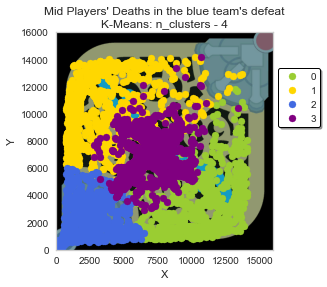

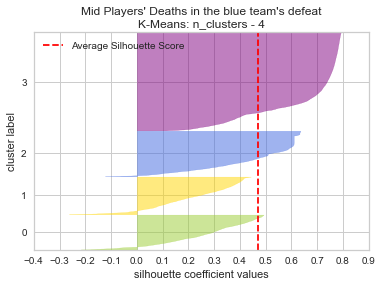

Silhouette score: 0.4716583530646929
3    3075
2    1434
1    1186
0    1099
Name: cluster, dtype: int64

Inertia: 5701.202073985203

Mean values for each cluster:


,cluster,coordinate_x,coordinate_y,timestamp
0,0,10205.139217,3369.735214,-0.010919
1,1,3934.366779,9603.906408,0.241990
2,2,1891.432357,1802.264993,-0.238494
3,3,7018.582114,7013.212033,-0.880000


In [124]:
# Apply K-means clustering
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(blueSideDefeatDiscretized_df.to_numpy())

# Add the cluster labels to the original dataframe
blueSideDefeat_df["cluster"] = kmeans.labels_
profiling_df["cluster"] = kmeans.labels_

cluster_colors = np.array(["yellowgreen", "gold", "royalblue", "purple"])
colors = visualizeResults(blueSideDefeat_df, blueSideDefeatDiscretized_df.to_numpy(), kmeans, "blue team's", kmeans, cluster_colors ,"defeat")

print("\nInertia: {}\n".format(kmeans.inertia_))

clusterMeanValues_df = clusterMeanValues(blueSideDefeat_df)
clusterMeanValues_df

In [125]:
clusterStandardDeviation_df = clusterStandardDeviation(blueSideDefeat_df)
clusterStandardDeviation_df

Standard deviation for each cluster:


,cluster,coordinate_x,coordinate_y,timestamp
0,0,2212.230398,2060.016843,0.663537
1,1,2403.095032,2424.922207,0.617035
2,2,1546.403025,1471.619401,0.764646
3,3,1045.925157,1048.494607,0.324962


In [126]:
clusterMinMaxValues_df = clusterMinMaxValues(blueSideDefeat_df)
clusterMinMaxValues_df

Max and Min values for each cluster:


,cluster,max coordinate_x,min coordinate_x,max coordinate_y,min coordinate_y,max timestamp,min timestamp
0,0,14090.0,5623.0,11867.0,758.0,1,-1
1,1,13666.0,731.0,14151.0,4613.0,1,-1
2,2,6480.0,124.0,6040.0,135.0,1,-1
3,3,13432.0,2792.0,14207.0,2954.0,0,-1


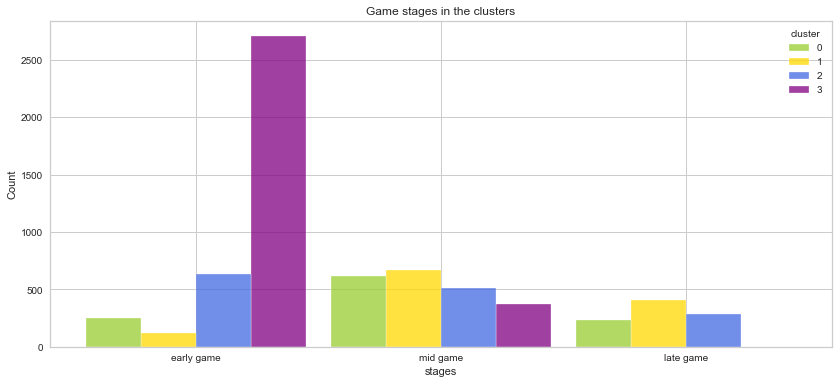

In [127]:
stagesPerClusterV2(blueSideDefeat_df, colors)

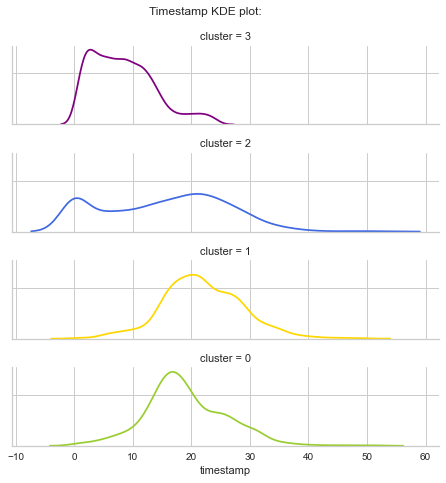

In [128]:
kdeTimestamp(profiling_df, cluster_colors)

Matches played with each champion:

In [129]:
champs = {}
for m in np.unique(profiling_df["gameId"]):
    temp_df = profiling_df[profiling_df["gameId"] == m]
    champs_df = np.unique(temp_df["champion"])
    #print(champs_df[0])
    try:
        champs[str(champs_df[0])] = champs[str(champs_df[0])] + 1
    except:
        champs[str(champs_df[0])] = 1
    #if(champ[champs_df[0]] =)
    #champ[champs_df[0]] = +1

print("Matches played with each champion:\n")
champs_df = pd.DataFrame.from_dict(champs, orient="index", columns=['matches'])
champs_df.sort_values(by=["matches"], ascending=False)
#print(champs)
    

Matches played with each champion:



,matches
AurelionSol,40
Jayce,22
Sylas,21
Akali,17
Tristana,17
Viktor,16
Azir,14
Annie,13
Zoe,11
Orianna,10


Deaths with each champion:

In [130]:
print("Deaths with each champion:\n")
profiling_df["champion"].value_counts()

Deaths with each champion:



AurelionSol    1090
Jayce           592
Sylas           566
Akali           477
Tristana        465
Viktor          419
Azir            377
Annie           367
Zoe             290
Orianna         275
Syndra          240
Leblanc         192
Irelia          187
Yone            169
Cassiopeia      169
Taliyah         128
LeeSin          100
Ryze             83
Akshan           68
Vex              64
Kassadin         55
Tryndamere       55
Lissandra        49
Zed              40
TwistedFate      34
KogMaw           33
Sett             32
Swain            31
Varus            29
Gragas           26
Corki            24
Viego            23
Renekton         23
Galio            22
Name: champion, dtype: int64

Number of deaths per champions in each cluster:

In [131]:
print("professional players played {} champions when they won on the red side\n".format(len(np.unique(profiling_df["champion"]))))
#print("{} was the champion with more deaths ({}) when pros win on the red side".format())
for cluster in np.unique(profiling_df["cluster"]):
    temp_df = profiling_df[profiling_df["cluster"] == cluster]
    print("Cluster {} - died with {} champions:\n {}".format(cluster,len(np.unique(temp_df["champion"])),np.unique(temp_df["champion"])))
    print("{}\n".format(temp_df["champion"].value_counts()))

professional players played 34 champions when they won on the red side

Cluster 0 - died with 34 champions:
 ['Akali' 'Akshan' 'Annie' 'AurelionSol' 'Azir' 'Cassiopeia' 'Corki'
 'Galio' 'Gragas' 'Irelia' 'Jayce' 'Kassadin' 'KogMaw' 'Leblanc' 'LeeSin'
 'Lissandra' 'Orianna' 'Renekton' 'Ryze' 'Sett' 'Swain' 'Sylas' 'Syndra'
 'Taliyah' 'Tristana' 'Tryndamere' 'TwistedFate' 'Varus' 'Vex' 'Viego'
 'Viktor' 'Yone' 'Zed' 'Zoe']
AurelionSol    164
Jayce          109
Sylas          100
Akali           96
Tristana        68
Azir            62
Annie           54
Viktor          48
Orianna         43
Cassiopeia      36
Syndra          36
Zoe             35
Leblanc         32
Irelia          28
Yone            26
Taliyah         24
LeeSin          17
Ryze            15
Tryndamere      11
TwistedFate      9
Kassadin         9
Lissandra        8
Akshan           8
Sett             7
Renekton         7
Vex              7
KogMaw           7
Gragas           6
Swain            5
Varus            5
Galio

---

### Blue Win Rate vs Red Win Rate

In [132]:
wins_df = mid_deaths_df[mid_deaths_df["victory"] == True]
wins_df

,gameId,team,summoner,region,champion,timestamp,coordinate_x,coordinate_y,level,minionsKilled,...,trueDamageDoneToChampions,trueDamageTaken,victory,eventType,skillSlot,buildingType,lane,monster,itemName,role
13768,EUW1_6273318007,Red,anonymous 52,euw1,Viktor,0.000000,14398.0,14582.0,1.0,0.0,...,0.0,0.0,True,NaN,NaN,NaN,NaN,NaN,NaN,MIDDLE
13769,EUW1_6273318007,Red,anonymous 52,euw1,Viktor,1.000050,9086.0,7494.0,1.0,0.0,...,0.0,0.0,True,NaN,NaN,NaN,NaN,NaN,NaN,MIDDLE
13770,EUW1_6273318007,Red,anonymous 52,euw1,Viktor,2.000267,7477.0,7407.0,1.0,4.0,...,0.0,0.0,True,NaN,NaN,NaN,NaN,NaN,NaN,MIDDLE
13772,EUW1_6273318007,Red,anonymous 52,euw1,Viktor,3.000267,6856.0,6572.0,3.0,18.0,...,0.0,0.0,True,NaN,NaN,NaN,NaN,NaN,NaN,MIDDLE
13775,EUW1_6273318007,Red,anonymous 52,euw1,Viktor,4.000483,9604.0,5456.0,4.0,26.0,...,0.0,32.0,True,NaN,NaN,NaN,NaN,NaN,NaN,MIDDLE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279073,KR_6376044922,Red,anonymous 78,kr,Azir,31.009683,5136.0,10483.0,15.0,214.0,...,550.0,177.0,True,NaN,NaN,NaN,NaN,NaN,NaN,MIDDLE
279077,KR_6376044922,Red,anonymous 78,kr,Azir,32.009917,2783.0,12866.0,15.0,223.0,...,550.0,390.0,True,NaN,NaN,NaN,NaN,NaN,NaN,MIDDLE
279080,KR_6376044922,Red,anonymous 78,kr,Azir,33.009950,1430.0,7841.0,16.0,235.0,...,550.0,390.0,True,NaN,NaN,NaN,NaN,NaN,NaN,MIDDLE
279082,KR_6376044922,Red,anonymous 78,kr,Azir,34.010050,4670.0,6741.0,16.0,236.0,...,569.0,390.0,True,NaN,NaN,NaN,NaN,NaN,NaN,MIDDLE


In [133]:
wins = len(np.unique(wins_df["gameId"]))
wins

609

In [134]:
b = (winsBlueSide/ wins) * 100
r = (winsRedSide/ wins) * 100

print("Win Rates:")
print(" Red: {} vs Blue: {}".format(r, b))

Win Rates:
 Red: 61.24794745484401 vs Blue: 38.752052545156


In [114]:
b = (blueSideVictory_df.shape[0]/ wins_df.shape[0]) * 100
r = (redSideVictory_df.shape[0]/ wins_df.shape[0]) * 100

print("Win Rates:")
print(" Red: {} vs Blue: {}".format(r, b))

Win Rates:
 Red: 59.306409130816505 vs Blue: 40.693590869183495
